SVM

In [23]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#set the seed 
np.random.seed(1)
#load the data 
df=pd.read_csv("Trump_fb_statuses_cleaned.csv")

Data cleaning part

In [24]:
# average number of the column "num_reactions"
df["num_reactions"].mean()
# add a new column "label" to the dataframe, if the number of reactions is greater than the average, then the label is 1, otherwise the label is 0
df["label"]=df["num_reactions"].apply(lambda x: 1 if x>df["num_reactions"].mean() else 0)
# drop the column "num_reactions"
df.drop("num_reactions",axis=1,inplace=True)
# drop the column "status_published" and "status_type"
df.drop(["status_published","status_type"],axis=1,inplace=True)
df.head()

,Unnamed: 0,status_message,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,0,Beautiful evening in Wisconsin- THANK YOU for ...,543,359,6178,572,39,17,0,7,0
1,1,The State Department's quid pro quo scheme pro...,3644,17653,26649,487,1155,75,191,5211,0
2,2,Crooked Hillary's State Department colluded wi...,8810,32594,73519,2943,1020,330,263,7552,1
3,3,"JournoCash: Media gives $382,000 to Clinton, $...",3665,5082,14029,122,2091,241,286,5927,0
4,4,"Exclusive: ""O'Keefe Video Sting Exposes 'Bird-...",4905,17087,26472,178,2588,154,417,10922,0


Class distribution

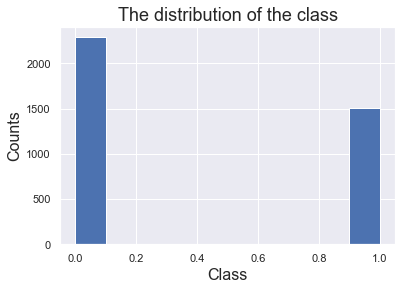

In [25]:
y=df["label"]
#plot the distribution of two classes
sns.set_theme()
plt.hist(y)
plt.title("The distribution of the class",fontsize=18)
plt.xlabel("Class",fontsize=16)
plt.ylabel("Counts",fontsize=16)
df.head()

# first 500 rows of the dataframe
df=df[:1000]


Use a baseline model for comparsion

In [26]:
#set a baseline model which random predict label
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))

random_classifier(y)

-----RANDOM CLASSIFIER-----
accuracy 0.4953862378064856
percision, recall, fscore, (array([0.59915164, 0.3927635 ]), array([0.49388112, 0.49767442]), array([0.54144705, 0.43903869]), array([2288, 1505]))


We can see that the accuracy of the baseline model is around 50%, as its only method is to guess. So if we have a better accuracy with our model, then it means that our model is good.

This model use texts to classify, so our features are texts transformed by “CountVectorizer”.

In [27]:
#sample a subset of negative samples
a=df[df["label"]==0].sample(100)
b=df[df['label']==1]
df=pd.concat([a,b])
df.reset_index(drop=True, inplace=True)
y=df['label']
X=df["status_message"]
#transform texts with countvectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())
#split the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

ACCURACY: 0.7983193277310925
NEGATIVE RECALL (Y=0): 0.125
NEGATIVE PRECISION (Y=0): 0.16666666666666666
POSITIVE RECALL (Y=1): 0.9029126213592233
POSITIVE PRECISION (Y=1): 0.8691588785046729



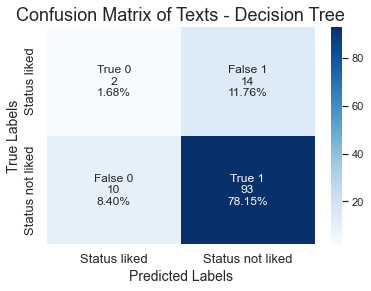

In [28]:
def confusion_plot(y_data,y_pred):
    print(
        "ACCURACY: "+str(accuracy_score(y_data,y_pred))+"\n"+
        "NEGATIVE RECALL (Y=0): "+str(recall_score(y_data,y_pred,pos_label=0))+"\n"+
        "NEGATIVE PRECISION (Y=0): "+str(precision_score(y_data,y_pred,pos_label=0))+"\n"+
        "POSITIVE RECALL (Y=1): "+str(recall_score(y_data,y_pred,pos_label=1))+"\n"+
        "POSITIVE PRECISION (Y=1): "+str(precision_score(y_data,y_pred,pos_label=1))+"\n"
    )
    cf=confusion_matrix(y_data, y_pred)
    # customize the anno
    group_names = ["True 0","False 1","False 0","True 1"]
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #plot the heatmap
    fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
    plt.title("Confusion Matrix of Texts - Decision Tree",fontsize=18)
    fig.set_xticklabels(["Status liked","Status not liked"],fontsize=13)
    fig.set_yticklabels(["Status liked","Status not liked"],fontsize=13)
    fig.set_xlabel("Predicted Labels",fontsize=14)
    fig.set_ylabel("True Labels",fontsize=14)
    plt.show()
#fit the model with the best hyperparametres
clf=SVC(C=1,kernel="linear")
clf.fit(x_train,y_train)
yp_test=clf.predict(x_test)
confusion_plot(y_test,yp_test)

Conclusion

This model is somewhat better than the baseline model, as its accuracy tends to be almost 80%. However, maybe due to the amount of data is not large enough or due to the fitness of this model to our dataset, it is not satisfying enough for me.
Hope we can use other methods such as bagging to improve it later.